In [1]:
# K means algorithm for clustering cancer patients

In [2]:
import numpy as np
import random

In [3]:
filename= './gene_expression_matrix.txt'
exp_matrix = np.loadtxt(filename)
print('The shape of the gene expression matrix is: ', exp_matrix.shape)
print('First 3 columns of the gene expression matrix: ')
print(exp_matrix[:,:3])


The shape of the gene expression matrix is:  (62, 2000)
First 3 columns of the gene expression matrix: 
[[ 8589.4163  5468.2409  4263.4075]
 [ 3825.705   6970.3614  5369.9688]
 [ 3230.3287  3694.45    3400.74  ]
 [ 7126.5988  3779.0682  3705.5537]
 [ 9330.6787  7017.2295  4723.7825]
 [14876.407   3201.9045  2327.6263]
 [ 4469.09    5167.0568  4773.68  ]
 [ 4913.7988  5215.0477  4288.6162]
 [ 7144.4062  2071.4023  1619.2762]
 [ 5382.3938  3848.4432  3372.4887]
 [ 7434.8213  6471.2114  5029.6175]
 [ 4214.9     2213.3568  1611.5188]
 [ 8865.4587  5447.1864  4887.0575]
 [ 5934.8888  3744.9886  3528.8337]
 [ 5821.6175  3748.2477  3439.9538]
 [ 9767.0275  9785.775   8605.0438]
 [13324.729   9505.0341  7740.9875]
 [12977.712   7565.6159  5735.2   ]
 [ 8753.2388  8978.1341  7777.8412]
 [ 5012.02    1383.4886  1269.6487]
 [ 6904.8012  2260.7773  1987.0012]
 [ 8347.9838  9852.2977  8178.965 ]
 [ 5100.5363  3343.3205  2925.67  ]
 [ 4554.5762  3139.3114  2958.4025]
 [ 5466.93   10152.273   7760.91

In [4]:
# Standarize the data 

column_means = exp_matrix.mean(axis=0)
standardized_exp_matrix = exp_matrix - column_means

standard_dev = np.std(exp_matrix, axis=0)
standardized_exp_matrix = standardized_exp_matrix / standard_dev

print('First 3 columns of the standardized gene expression matrix: ')
print(standardized_exp_matrix[:,:3])

First 3 columns of the standardized gene expression matrix: 
[[ 0.51292947  0.23088092  0.09353633]
 [-1.03981707  0.92273048  0.70714741]
 [-1.23388184 -0.58609512 -0.3848306 ]
 [ 0.03611955 -0.5471215  -0.21580511]
 [ 0.75454626  0.94431708  0.34882377]
 [ 2.56219368 -0.81295267 -0.97989429]
 [-0.83010373  0.09216096  0.37649296]
 [-0.68514951  0.1142647   0.10751508]
 [ 0.04192392 -1.33364156 -1.37268904]
 [-0.53240951 -0.51516863 -0.40049653]
 [ 0.13658563  0.69283101  0.51841559]
 [-0.91295775 -1.26825988 -1.37699068]
 [ 0.60290635  0.2211836   0.43936313]
 [-0.35232204 -0.56281795 -0.3138    ]
 [-0.38924318 -0.56131687 -0.36308574]
 [ 0.89677551  2.2194591   2.50106326]
 [ 2.0564194   2.09015492  2.02192621]
 [ 1.94330813  1.19689394  0.90967565]
 [ 0.56632792  1.8474743   2.04236235]
 [-0.653134   -1.65048218 -1.56656471]
 [-0.03617607 -1.24641886 -1.16877794]
 [ 0.43423379  2.25009826  2.26479377]
 [-0.62428184 -0.74781902 -0.64826672]
 [-0.80223924 -0.84178193 -0.63011587]
 [-

In [5]:
#Calculates euclidean distance of a vector to 2 centroids

def euclidean_distance(c1, c2, v):
    d1 = np.linalg.norm(c1-v)
    d2 = np.linalg.norm(c2-v)
    #d1 = np.sqrt(np.sum((c1 - v)**2))
    #d2 = np.sqrt(np.sum((c2 - v)**2))
    
    return np.array([d1, d2])

In [6]:
#Assigns data points to their closest centroid

def assign_to_class(c1,c2,expression_mat):
    assigned_classes = {}
    sample_size = np.shape(expression_mat)[0]
    for i in range(sample_size-1):
        distances = euclidean_distance(c1, c2, expression_mat[i])
        chosen_class = np.argmin(distances)
        
        if chosen_class not in assigned_classes:
            assigned_classes[chosen_class] = [expression_mat[i]]
        else:
            assigned_classes[chosen_class].append(expression_mat[i])

    return assigned_classes
        

In [7]:
#Updates the cetroids according to in-class data points

def update_centroid(expression_mat, centroid_classes):
    centroids = []
    #print(centroid_classes)
    for class_name, vals in centroid_classes.items():
        centroids.append(np.average(vals, axis = 0))
        
    return centroids[0], centroids[1]

In [8]:
#Predicts the cluster for the test groups

def predict(c1,c2,v):
    distances = euclidean_distance(c1, c2, v)
    chosen_class = np.argmin(distances)
    
    return chosen_class

In [9]:
#Calculates and prints percentage of cancer patients ended up in cluster0 and cluster1

def print_percentage(centroid_classes, cancers, not_cancers):
    pers = []
    for cluster_name, cluster_particip in centroid_classes.items():
        cancer_num, not_num = 0, 0
        for i in cluster_particip:
            if i in cancers:
                cancer_num+=1
            else:
                not_num +=1
        per = cancer_num / (cancer_num + not_num)

        pers.append(per)
    print('Cancer patients ended up in cluster0: ', pers[0])
    print('Cancer patients ended up in cluster1: ', pers[1])

In [10]:
#K means clustering algorithm

def k_means(expression_mat):
    cancers = expression_mat[:40]
    not_cancers = expression_mat[40:61]
    
    
    #Creates first 2 centroids in a random fashion
    sample_size = np.shape(expression_mat)[0]
    random.seed(10)
    c = random.sample(range(0,sample_size-1),2)
    c1, c2 = expression_mat[c[0]], expression_mat[c[1]]
    
    centroid_classes = {}

    for i in range(50):
        
        #Assigns points to centroid classes
        centroid_classes = assign_to_class(c1,c2,expression_mat)

        #Update the centroid
        c1, c2 = update_centroid(expression_mat, centroid_classes)
        #print_percentage(centroid_classes, cancers, not_cancers)

        
    cancers = expression_mat[:40]
    not_cancers = expression_mat[40:61]
        
    print_percentage(centroid_classes, cancers, not_cancers)
    
    sample_62 = expression_mat[-1,:]
    predicted_62 = predict(c1,c2,sample_62)
    print('Predicted cluster for 62nd patient: cluster', predicted_62)
    

k_means(standardized_exp_matrix) 


Cancer patients ended up in cluster0:  0.7608695652173914
Cancer patients ended up in cluster1:  0.8
Predicted cluster for 62nd patient: cluster 0


In [11]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

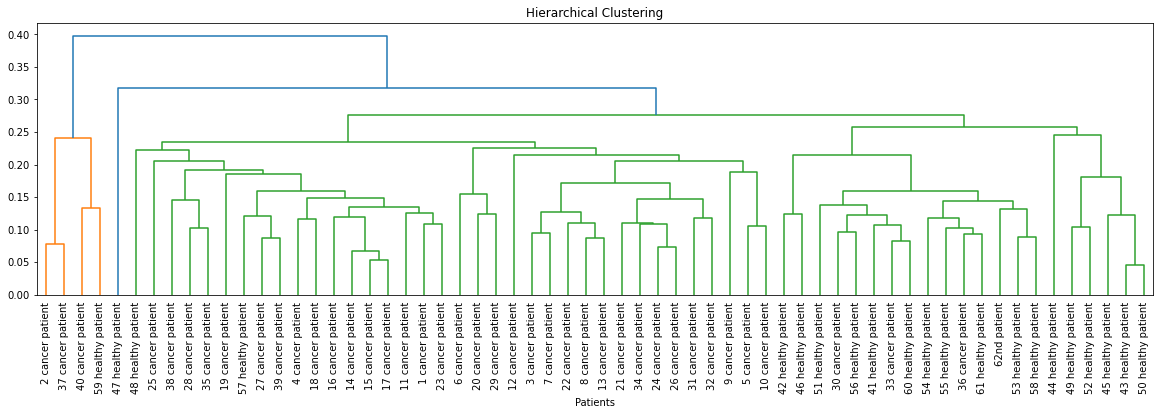

In [12]:
# Hieararchical clustering with scipy

Z = linkage(exp_matrix, 'average', 'correlation')


# Label name creation for visualization
label_list = []
for i in range (40):
    sample = str((1+i)) + ' cancer patient'
    label_list.append(sample)
for i in range (21):
    sample = str((41 +i)) + ' healthy patient'
    label_list.append(sample)
label_list.append('62nd patient')


# Dendrogram visualization for patients 
plt.figure(figsize=(20, 5))
plt.title('Hierarchical Clustering')
plt.xlabel('Patients')

dendrogram(Z,labels=label_list,leaf_rotation=90., leaf_font_size=10.)

plt.show()

In [ ]:
'''
The percentage of cancer patients in the clusters are not significantly important. 
When I changed random seed, percentages changed also, but I could not catch meaningful change.
There are 46 sample in the cluster0 while there are 15 in cluster1. 

Predicted cluster for the 62nd patient is cluster0 which has 0.76 percent cancer patients ratio. However, 
because the other cluster has 0.8 percent, we cannot reach a reliable conclusion about 
the disease status of the patient. There might be two reasons behind this conclusion. 

This might be because there are not enough samples (61) to meet the high dimensionality (2000). 
When the dimensionality is high, it is harder to distinguish the samples from each other with low number of samples. 
This is because all data points appear equidistant from the others. When their distances are 
all equal, then they lookalike for clustering and formed clusters become unmeaningful. 

This problem can be solved by dimensionality reduction with methods like PCA. Dimensionality reduction 
helps to reduce the number of attributes in the data while holding the variation of the set. Also, 
subclustering the two clusters might also help. '''